# Project: Iris Classification Problem

## Description

This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick,  spchadwick@espeedaz.net ).  The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


## Bookstores

In [204]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path


In [205]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)
print("Seaborn", sns.__version__)

NumPy 1.26.4
Pandas 2.1.4
Matplotlib 3.8.0
Scikit-learn 1.2.2
Seaborn 0.12.2


## DataSet

https://archive.ics.uci.edu/dataset/53/iris

### Dataset load

In [206]:
os.listdir("data/")

['data.csv']

In [207]:
data_file = Path.cwd().resolve()/"Data"/"data.csv"
df_raw = pd.read_csv(data_file)
df_raw.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Descritaset

In [208]:
##  Size
df_raw.shape

(150, 5)

In [209]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exploratory data analysis

In [210]:
df_processed = df_raw

change the name of the target variable

In [211]:
df_processed = df_processed.rename(columns={"species":"target"})
df_processed.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Descriptive statistics variable numerical

In [212]:
print(df_processed.describe(),'\n')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 



Descriptive statistics variable object

In [213]:
print(df_processed.describe(include="object"),'\n')

        target
count      150
unique       3
top     setosa
freq        50 



Group by Target

In [214]:
print(df_processed.groupby('target').size())

target
setosa        50
versicolor    50
virginica     50
dtype: int64


### Null handling

In [215]:
df_processed.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

#### Remove Nulls

In [216]:
df_processed.dropna(inplace=True)

### Delete Data

#### Delete unnecessary columns

In [217]:
df_processed.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [218]:
df_processed.drop({}, axis=1, inplace=True)
df_processed.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Graphics

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 500x500 with 0 Axes>

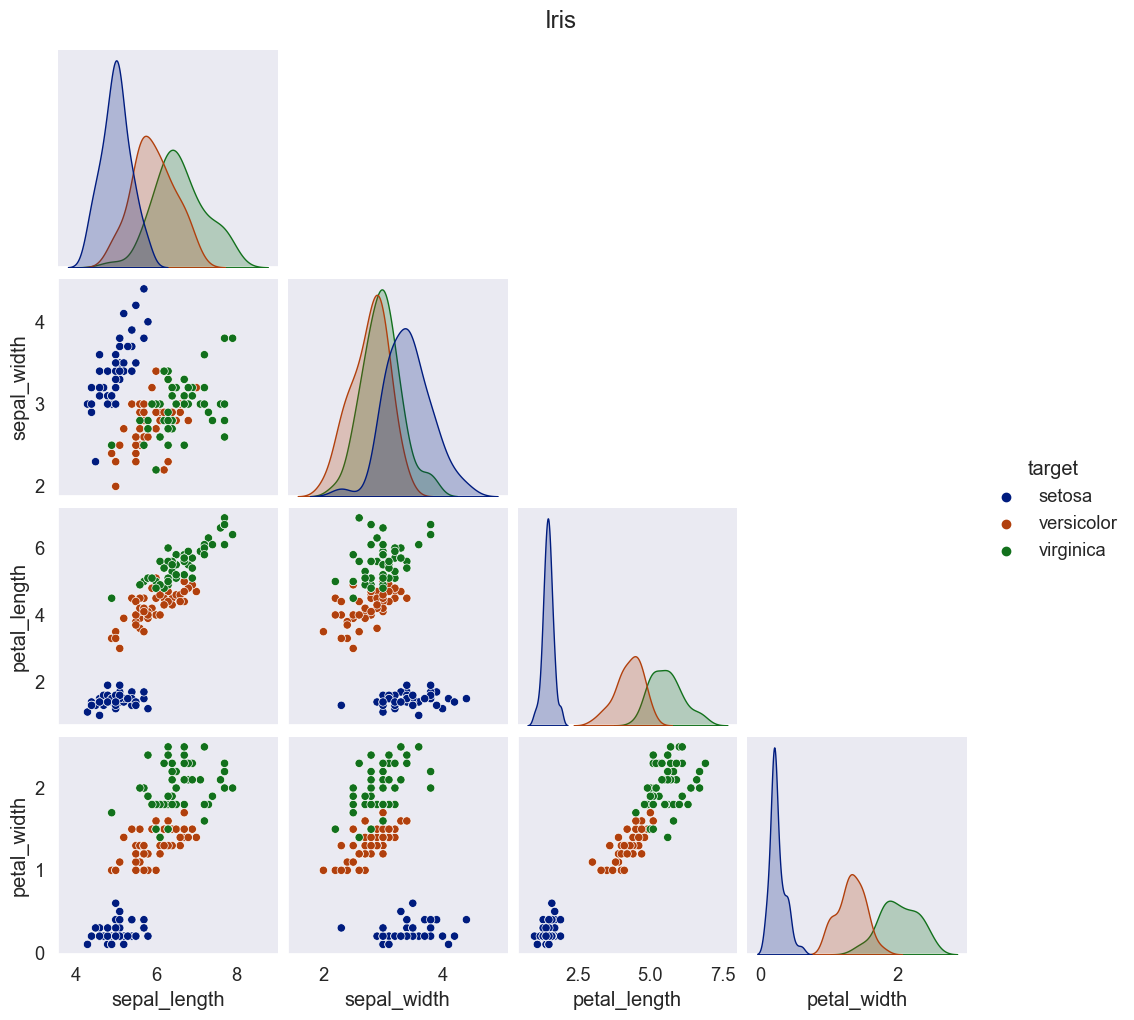

In [219]:
fig0 = plt.figure(figsize=(5,5))
sns.set(style="dark", font_scale=1.2)
fig = sns.pairplot(data=df_processed, hue='target', palette='dark', corner=True)
fig.fig.suptitle('Iris', y=1.02)
plt.show()

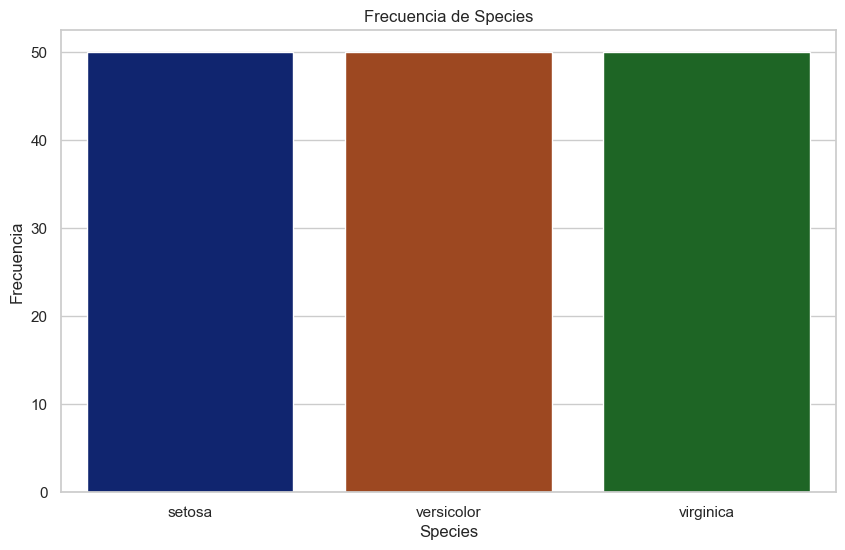

In [220]:
fig1=plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=df_processed, x='target', palette='dark')
plt.title('Frecuencia de Species')
plt.xlabel('Species')
plt.ylabel('Frecuencia')
plt.show()

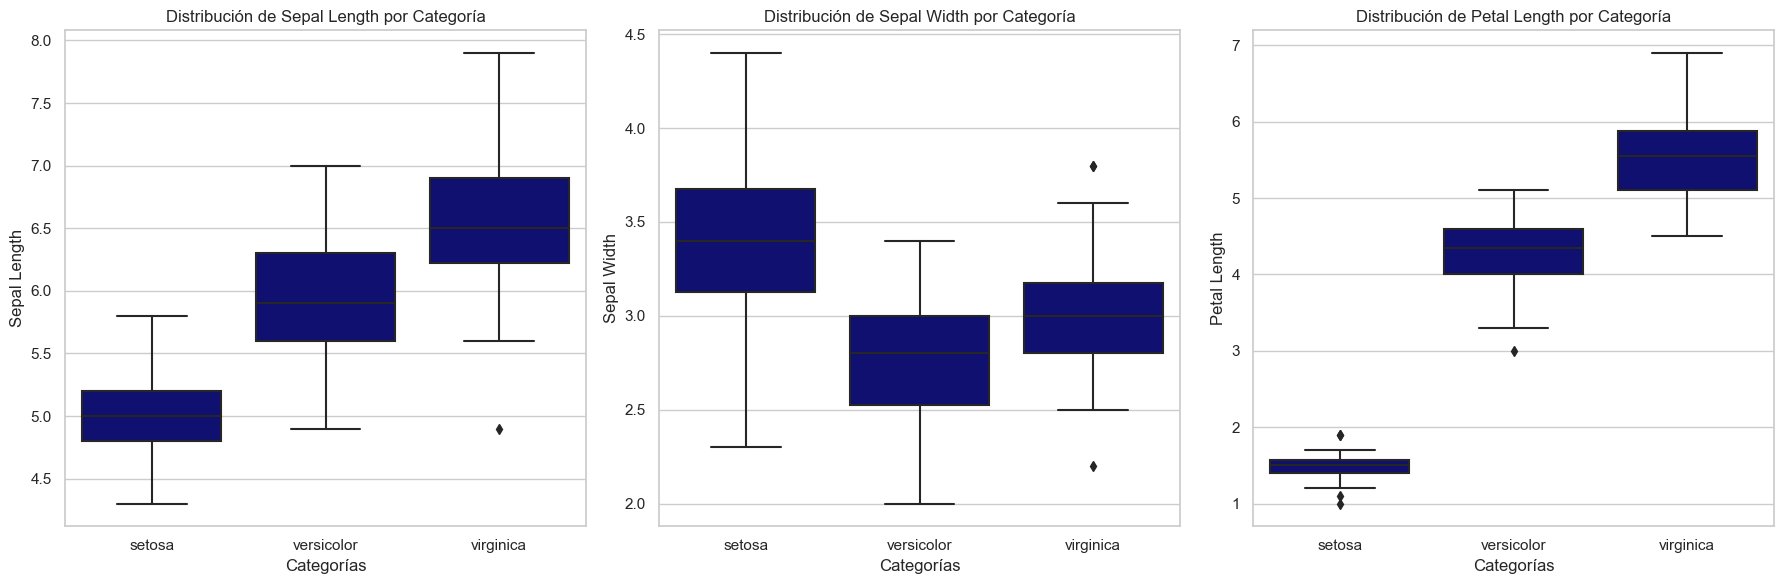

In [221]:
fig2=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.boxplot(data=df_processed, x='target', y='sepal_length', color='navy', ax=axes[0])
axes[0].set_title('Distribución de Sepal Length por Categoría')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Sepal Length')
# Gráfico 2: Boxplot
sns.boxplot(data=df_processed, x='target', y='sepal_width', color='navy', ax=axes[1])
axes[1].set_title('Distribución de Sepal Width por Categoría')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Sepal Width')
# Gráfico 3: Boxplot
sns.boxplot(data=df_processed, x='target', y='petal_length', color='navy', ax=axes[2])
axes[2].set_title('Distribución de Petal Length por Categoría')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Petal Length')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()


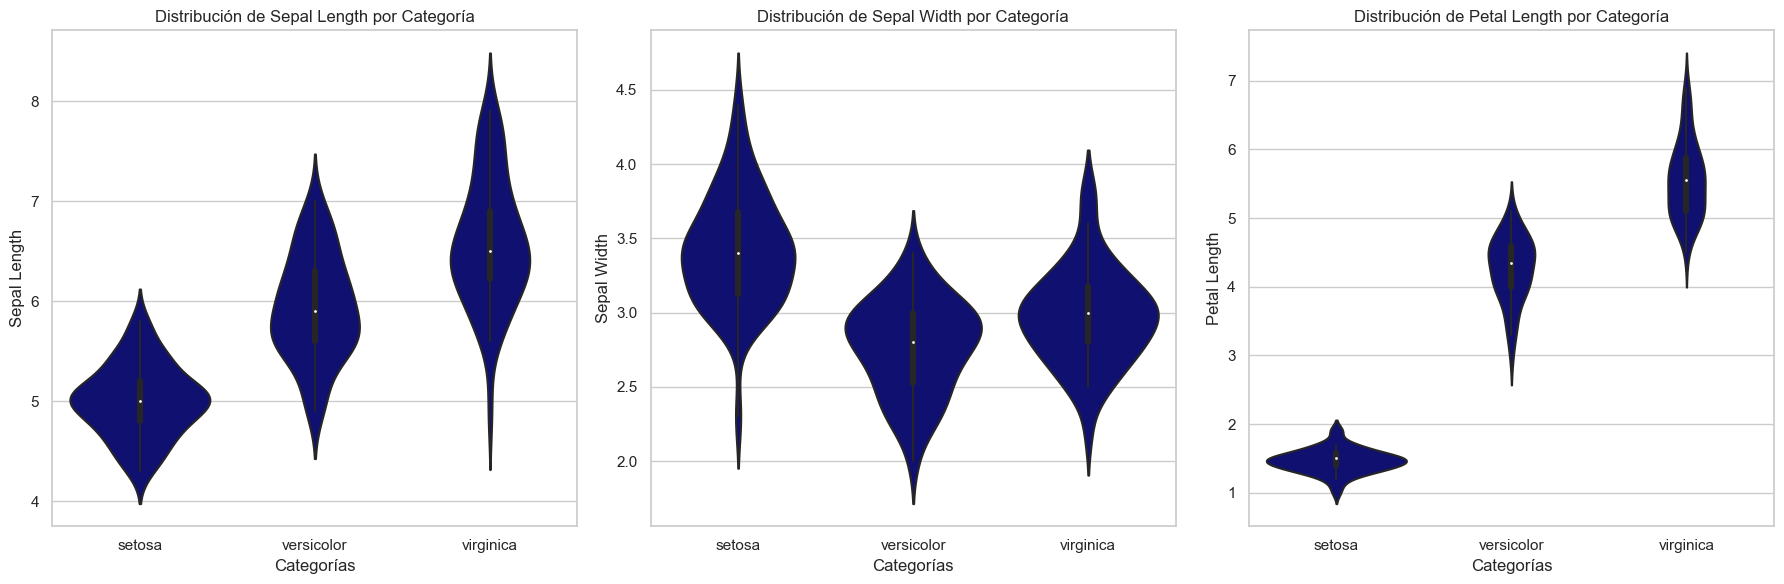

In [222]:
fig3=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.violinplot(data=df_processed, x='target', y='sepal_length', color='navy', ax=axes[0])
axes[0].set_title('Distribución de Sepal Length por Categoría')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Sepal Length')
# Gráfico 2: Boxplot
sns.violinplot(data=df_processed, x='target', y='sepal_width', color='navy', ax=axes[1])
axes[1].set_title('Distribución de Sepal Width por Categoría')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Sepal Width')
# Gráfico 3: Boxplot
sns.violinplot(data=df_processed, x='target', y='petal_length', color='navy', ax=axes[2])
axes[2].set_title('Distribución de Petal Length por Categoría')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Petal Length')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

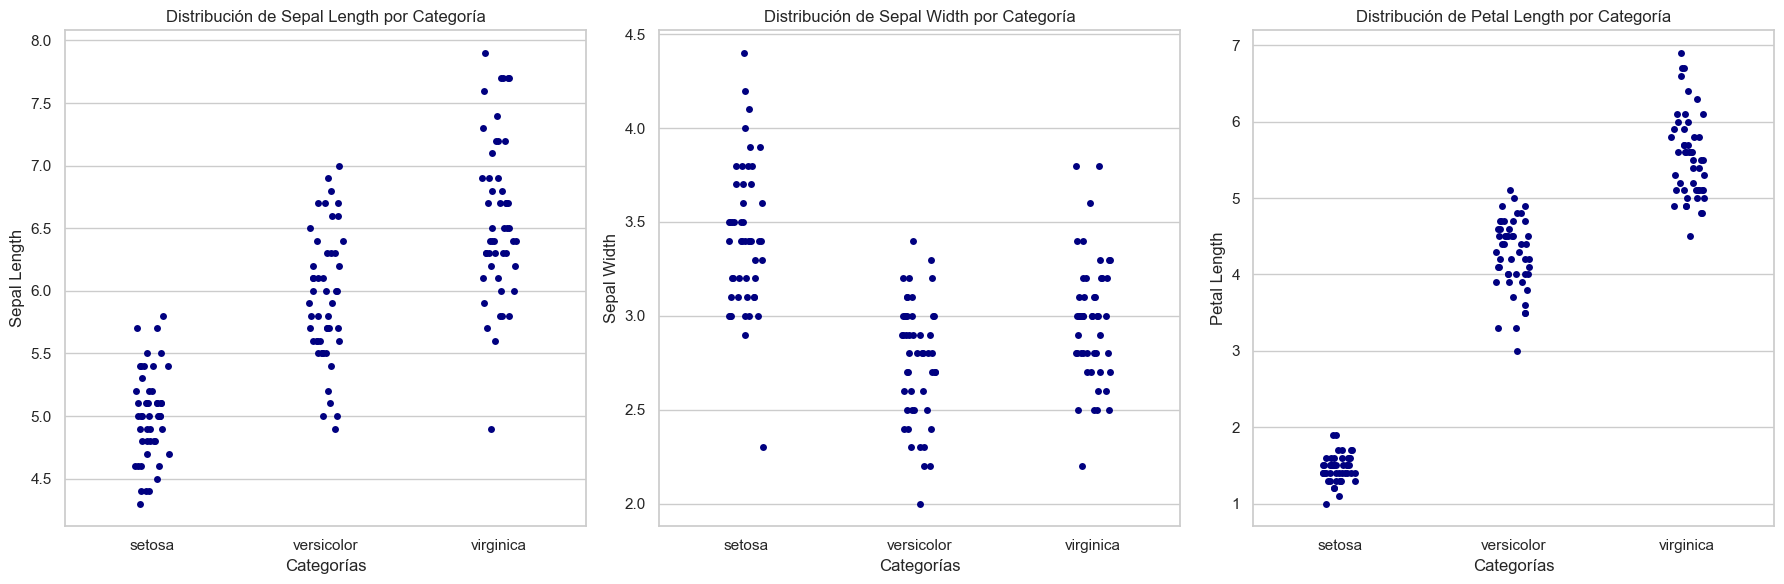

In [223]:
fig4=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.stripplot(data=df_processed, x='target', y='sepal_length', color='navy', ax=axes[0])
axes[0].set_title('Distribución de Sepal Length por Categoría')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Sepal Length')
# Gráfico 2: Boxplot
sns.stripplot(data=df_processed, x='target', y='sepal_width', color='navy', ax=axes[1])
axes[1].set_title('Distribución de Sepal Width por Categoría')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Sepal Width')
# Gráfico 3: Boxplot
sns.stripplot(data=df_processed, x='target', y='petal_length', color='navy', ax=axes[2])
axes[2].set_title('Distribución de Petal Length por Categoría')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Petal Length')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()


c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

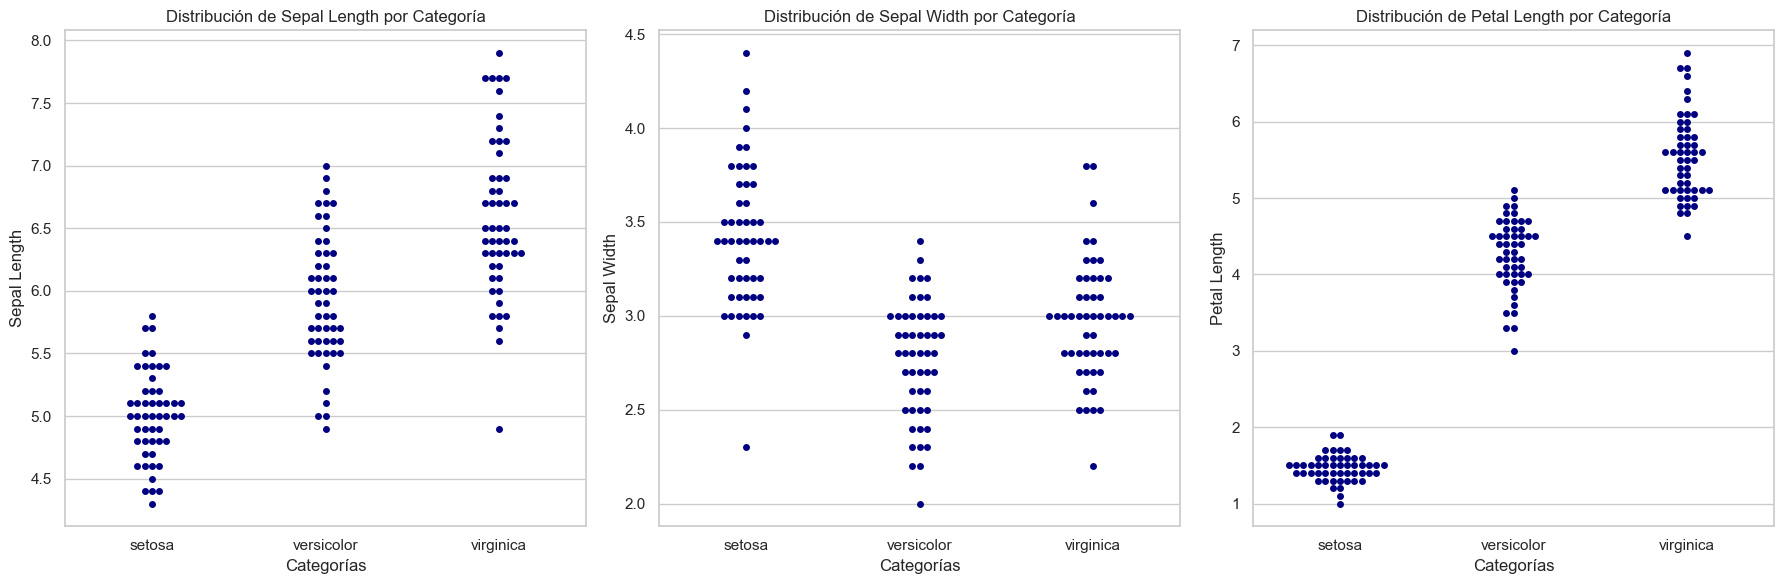

In [224]:
fig5=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.swarmplot(data=df_processed, x='target', y='sepal_length', color='navy', ax=axes[0])
axes[0].set_title('Distribución de Sepal Length por Categoría')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Sepal Length')
# Gráfico 2: Boxplot
sns.swarmplot(data=df_processed, x='target', y='sepal_width', color='navy', ax=axes[1])
axes[1].set_title('Distribución de Sepal Width por Categoría')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Sepal Width')
# Gráfico 3: Boxplot
sns.swarmplot(data=df_processed, x='target', y='petal_length', color='navy', ax=axes[2])
axes[2].set_title('Distribución de Petal Length por Categoría')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Petal Length')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()


## Modeling

### Partitioning the dataset into test and training

In [225]:
X = df_processed.drop(columns = ['target'])
y = df_processed['target']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (150, 4)
Dimensiones de y: (150,)


In [226]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [227]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

### Training

In [228]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.3,
    random_state = 4
)